<a href="https://colab.research.google.com/github/KaranKochhar04/MinorProject/blob/MinorProject/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

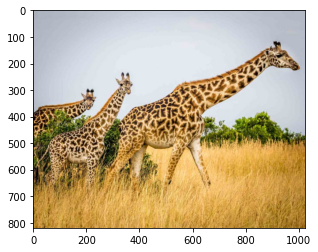

In [160]:
img = plt.imread('/content/drive/MyDrive/images/giraffe/gir27.jpg')
plt.imshow(img)

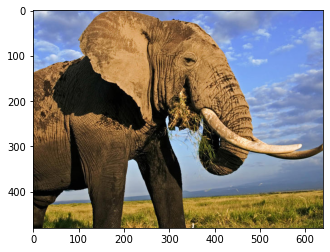

In [161]:
img = plt.imread('/content/drive/MyDrive/images/elephant/ele1.jpg')
plt.imshow(img)

In [162]:
# Preprocessing

import os
import numpy as np
datadir = '/content/drive/MyDrive/images'

categories = ['giraffe','elephant'] 
target = []
imgs = []
flat_data = []

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)  # Path is created to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(200,150,3))                 # Resized (Data normalized between 0 to 1)
    flat_data.append(np.ndarray.flatten(img_resize))      # Flattened
    target.append(class_num)
    imgs.append(img_resize)

flat_data = np.array(flat_data)
target = np.array(target)
imgs = np.array(imgs)

In [163]:
len(flat_data[0])

90000

<BarContainer object of 2 artists>

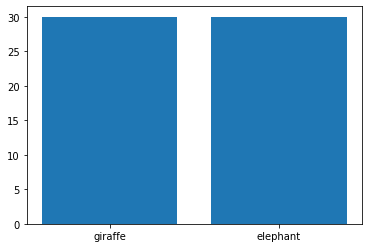

In [164]:
unique,counts = np.unique(target,return_counts=True)
plt.bar(categories,counts)

In [165]:
# Create Dataframe

df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89961,89962,89963,89964,89965,89966,89967,89968,89969,89970,89971,89972,89973,89974,89975,89976,89977,89978,89979,89980,89981,89982,89983,89984,89985,89986,89987,89988,89989,89990,89991,89992,89993,89994,89995,89996,89997,89998,89999,Target
0,0.227451,0.674510,0.866667,0.227451,0.674510,0.866667,0.227451,0.674510,0.866667,0.227451,0.674510,0.866667,0.227451,0.674510,0.866667,0.227451,0.674510,0.866667,0.227451,0.674510,0.866667,0.223529,0.674510,0.870588,0.207843,0.674510,0.870588,0.203922,0.678431,0.874510,0.203922,0.678431,0.874510,0.207843,0.678431,0.874510,0.207843,0.678431,0.874510,0.211765,...,0.513255,0.764863,0.956863,0.509490,0.766824,0.956863,0.505412,0.768941,0.956863,0.499686,0.772706,0.956863,0.495922,0.774667,0.956863,0.493804,0.776784,0.956863,0.489882,0.780392,0.956863,0.478431,0.780392,0.960784,0.478431,0.784314,0.964706,0.478431,0.784314,0.964706,0.474510,0.780392,0.960784,0.474196,0.780078,0.960471,0.474196,0.779765,0.960471,0
1,0.356863,0.737255,0.905882,0.356863,0.737255,0.905882,0.361498,0.739145,0.905882,0.364706,0.733333,0.905882,0.364706,0.737255,0.905882,0.360784,0.741176,0.905882,0.360784,0.741176,0.909804,0.360784,0.745098,0.913725,0.363059,0.741176,0.909804,0.364645,0.741176,0.909804,0.360784,0.741176,0.905882,0.368627,0.741176,0.909804,0.364706,0.749020,0.909804,0.364706,...,0.497020,0.425490,0.258314,0.444941,0.383236,0.227451,0.517569,0.454039,0.269490,0.450275,0.360078,0.229176,0.360513,0.302118,0.195843,0.417333,0.376235,0.229098,0.486662,0.413804,0.258353,0.433398,0.367751,0.216235,0.463327,0.351261,0.194072,0.365647,0.288392,0.176340,0.317804,0.255929,0.149176,0.352941,0.283216,0.165725,0.302775,0.251686,0.161382,0
2,0.476471,0.633333,0.719608,0.492157,0.641176,0.734314,0.502941,0.650980,0.741176,0.513725,0.660784,0.745098,0.525490,0.667647,0.754902,0.531373,0.675490,0.769608,0.541176,0.683333,0.774510,0.546078,0.689216,0.780392,0.559804,0.697059,0.786275,0.560784,0.700000,0.789216,0.566667,0.705882,0.795098,0.571569,0.711765,0.796078,0.574510,0.715686,0.800980,0.574510,...,0.560784,0.376471,0.094118,0.634314,0.417647,0.123529,0.639216,0.428431,0.138235,0.661765,0.463725,0.135294,0.697059,0.470588,0.168627,0.694118,0.461765,0.149020,0.602941,0.392157,0.096078,0.595098,0.400980,0.111765,0.631373,0.439216,0.132353,0.633333,0.414706,0.119608,0.608824,0.395098,0.107843,0.621569,0.452941,0.116667,0.513725,0.369608,0.071569,0
3,0.284569,0.257118,0.151139,0.298157,0.266922,0.176059,0.274098,0.242725,0.169902,0.275137,0.239843,0.181137,0.326235,0.289765,0.234629,0.345135,0.308665,0.254802,0.366092,0.327255,0.279941,0.398627,0.359412,0.322088,0.352882,0.317980,0.278778,0.242802,0.227075,0.183978,0.206041,0.181335,0.142120,0.256980,0.225484,0.186269,0.319196,0.279980,0.242725,0.369000,...,0.425559,0.356863,0.317647,0.443137,0.372549,0.333333,0.429804,0.359216,0.320000,0.401610,0.331022,0.291806,0.392157,0.321569,0.282353,0.405882,0.335294,0.296078,0.411524,0.340935,0.301720,0.401451,0.330863,0.291647,0.399978,0.329390,0.290175,0.426935,0.356347,0.317131,0.421500,0.350912,0.311696,0.427588,0.357000,0.317784,0.435390,0.364802,0.325586,0
4,0.658824,0.717647,0.850980,0.662745,0.725490,0.862745,0.662745,0.729412,0.868627,0.666667,0.725490,0.864706,0.662745,0.725490,0.858824,0.660784,0.729412,0.858824,0.662745,0.729412,0.870588,0.666667,0.729412,0.870588,0.668627,0.733333,0.865686,0.662745,0.729412,0.862745,0.662745,0.733333,0.870588,0.659804,0.733333,0.866667,0.666667,0.733333,0.868627,0.670588,...,0.490196,0.521569,0.419608,0.478431,0.502941,0.400000,0.470588,0.489216,0.387255,0.475490,0.485294,0.387255,0.482353,0.480392,0.390196,0.482353,0.478431,0.376471,0.493137,0.482353,0.376471,0.501961,0.496078,0.395098,0.504902,0.503922,0.391176,0.493137,0.495098,0.380392,0.490196,0.499020,0.379412,0.496078,0.502941,0.378431,0.498039,0.505882,0.372549,0


In [166]:

# The number of colums obtained is corresponding the the lenght obtained from flat data i.e. 90000

In [167]:
# Splitting of data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.35, random_state = 0)

In [168]:
print(y_train.shape)
print(y_test.shape)

(39,)
(21,)


In [169]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([21, 18]))

In [170]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([ 9, 12]))

In [171]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn import svm

param = {
    'kernel':['linear','rbf','poly'],
    'C':[0.1,1,10,100,1000]
}

svc = svm.SVC(probability=True)
grid = GridSearchCV(svc,param)
grid.fit(x_train,y_train)                                         # The best C and Kernel value for our model

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [172]:
y_pred = grid.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [173]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [175]:
accuracy_score(y_pred, y_test)

0.8571428571428571

In [176]:
# It was observed that the value of accuracy changes as the value of random state changes

In [177]:
confusion_matrix(y_pred,y_test)

array([[ 8,  2],
       [ 1, 10]])

In [178]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.83      0.91      0.87        11

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



In [179]:
# Saving the model
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [180]:
model = pickle.load(open('img_model.p','rb'))

Enter the link https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/1200px-African_Bush_Elephant.jpg
(1800, 1200, 3)
 Predicted Output: elephant


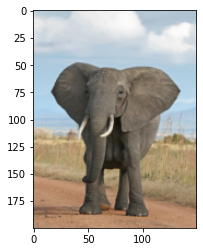

In [182]:
# Testing a new image
flat_data = []
link = input('Enter the link ')
img = imread(link)
img_resize = resize(img,(200,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f' Predicted Output: {y_out}')